In [21]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from scipy.io import wavfile
from scipy import linalg as LA
from numpy.random import randn as RNDN

def g(x):
    out = np.tanh(x)
    return out


def dg(x):
    out = 1 - g(x) * g(x)
    return out

# Dimension
dim = 2

In [22]:
samplingRate, signal1 = wavfile.read('Sounds/Mixture_input/mix1.wav')
print("Sampling rate= ", samplingRate)
print("Data type is ", signal1.dtype)


Sampling rate=  8000
Data type is  uint8


In [23]:
signal1 = signal1 / 255.0 - 0.5

# Output information about the sound samples.
a = signal1.shape
n = a[0]
print("Number of samples: ", n)
n = n * 1.0


Number of samples:  50000


In [24]:
samplingRate, signal2 = wavfile.read('sourceSounds/mix2.wav')
signal2 = signal2 / 255.0 - 0.5

In [25]:
x = [signal1, signal2]


In [26]:
signal1.shape

(50000,)

Text(0.5, 1.0, 'Original data')

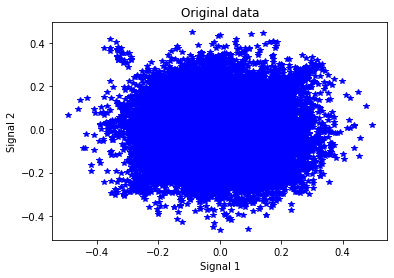

In [27]:
plt.figure()
plt.plot(x[0], x[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Original data")

In [28]:
cov = np.cov(x)
# Calculate eigenvalues and eigenvectors of the covariance matrix.
d, E = LA.eigh(cov)
# Generate a diagonal matrix with the eigenvalues as diagonal elements.
D = np.diag(d)


Text(0.5, 1.0, 'Whitened data')

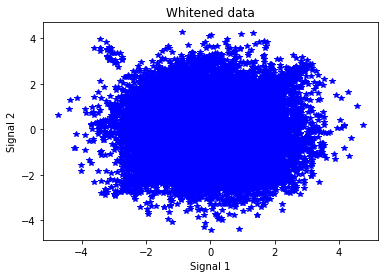

In [29]:
Di = LA.sqrtm(LA.inv(D))
# Perform whitening. xn is the whitened matrix.
xn = np.dot(Di, np.dot(np.transpose(E), x))
xn=np.dot(E,xn)
# Plot whitened data to show new structure of the data.
plt.figure()
plt.plot(xn[0], xn[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Whitened data")

In [30]:
w1 = RNDN(dim, 1)
w1 = w1 / LA.norm(w1)

w0 = RNDN(dim, 1)
w0 = w0 / LA.norm(w0)


# Running the fixed-point algorithm, with gradient descent
epsilon = 0.01  # Determines the extent of convergence
alpha = 1  # Step-size for gradient-descent


In [31]:
while (abs(abs(np.dot(np.transpose(w0), w1)) - 1) > epsilon):
    w0 = w1
    w1 = np.dot(xn, np.transpose(g(np.dot(np.transpose(w1), xn)))) / \
        n - alpha * \
        np.transpose(np.mean(np.dot(dg(np.transpose(w1)), xn), axis=1)) * w1
    w1 = w1 / LA.norm(w1)

w2 = RNDN(dim, 1)
w2 = w2 / LA.norm(w2)

w0 = RNDN(dim, 1)
w0 = w0 / LA.norm(w0)


In [32]:
while (abs(abs(np.dot(np.transpose(w0), w2)) - 1) > 0.01):
    w0 = w2
    w2 = np.dot(xn, np.transpose(g(np.dot(np.transpose(w2), xn)))) / \
        n - alpha * \
        np.transpose(np.mean(np.dot(dg(np.transpose(w2)), xn), axis=1)) * w2
    w2 = w2 - np.dot(np.transpose(w2), w1) * w1
    w2 = w2 / LA.norm(w2)

In [33]:
w = np.transpose([np.transpose(w1), np.transpose(w2)])
s = np.dot(w, x)

# Plot the separated sources.
time = np.arange(0, n, 1)
time = time / samplingRate
time = time * 1000  # convert to milliseconds


Text(0.5, 1.0, 'Original signal 2')

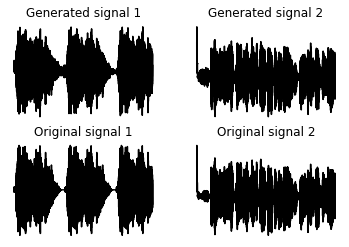

In [34]:
plt.figure()
plt.subplot(2, 2, 1).set_axis_off()
plt.plot(time, s[0][0], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 1")

plt.subplot(2, 2, 2).set_axis_off()
plt.plot(time, s[1][0], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 2")
samplingRate, orig1 = wavfile.read('sourceSounds/source1.wav')
orig1 = orig1 / 255.0 - 0.5  # uint8 takes values from 0 to 255

plt.subplot(2,2, 3).set_axis_off()
plt.plot(time, orig1, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Original signal 1")

samplingRate, orig2 = wavfile.read('sourceSounds/source2.wav')
orig2 = orig2 / 255.0 - 0.5  # uint8 takes values from 0 to 255

plt.subplot(2, 2, 4).set_axis_off()
plt.plot(time, orig2, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Original signal 2")


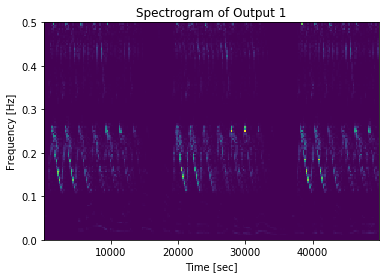

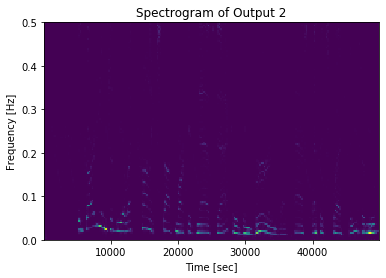

In [35]:
plt.figure()
f, t, S = signal.spectrogram(s[0][0])
plt.pcolormesh(t, f, S)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Output 1')

plt.figure()
f, t, S = signal.spectrogram(s[1][0])
plt.pcolormesh(t, f, S)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Output 2')

# Storing numpy array as audio
wavfile.write('fastICA/out3.wav', samplingRate, np.transpose(s[0][0]))
wavfile.write('fastICA/out4.wav', samplingRate, np.transpose(s[1][0]))